In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix, f1_score


from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import IsolationForest
from sklearn.svm import OneClassSVM
from sklearn.neighbors import LocalOutlierFactor

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("creditcard.csv")

In [5]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
5,2.0,-0.425966,0.960523,1.141109,-0.168252,0.420987,-0.029728,0.476201,0.260314,-0.568671,...,-0.208254,-0.559825,-0.026398,-0.371427,-0.232794,0.105915,0.253844,0.081080,3.67,0
6,4.0,1.229658,0.141004,0.045371,1.202613,0.191881,0.272708,-0.005159,0.081213,0.464960,...,-0.167716,-0.270710,-0.154104,-0.780055,0.750137,-0.257237,0.034507,0.005168,4.99,0
7,7.0,-0.644269,1.417964,1.074380,-0.492199,0.948934,0.428118,1.120631,-3.807864,0.615375,...,1.943465,-1.015455,0.057504,-0.649709,-0.415267,-0.051634,-1.206921,-1.085339,40.80,0
8,7.0,-0.894286,0.286157,-0.113192,-0.271526,2.669599,3.721818,0.370145,0.851084,-0.392048,...,-0.073425,-0.268092,-0.204233,1.011592,0.373205,-0.384157,0.011747,0.142404,93.20,0
9,9.0,-0.338262,1.119593,1.044367,-0.222187,0.499361,-0.246761,0.651583,0.069539,-0.736727,...,-0.246914,-0.633753,-0.120794,-0.385050,-0.069733,0.094199,0.246219,0.083076,3.68,0


In [6]:
y = df['Class']

In [7]:
df_data=df.drop('Class',1)

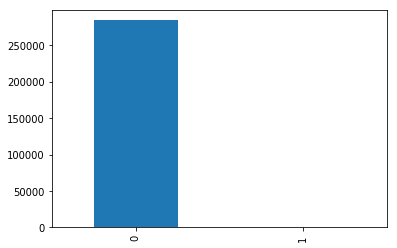

In [8]:
count_Class=pd.value_counts(y, sort= True)
count_Class.plot(kind= 'bar')

Classes are very unbalanced.

In [9]:
frauds= len(df[df["Class"]==1])
normals = len(df[df["Class"]==0])
total= frauds + normals
fraud_percent= (frauds / total)*100
normal_percent= (normals / total)*100
print("Class 0 percentage = ", normal_percent)
print("Class 1 percentage = ", fraud_percent)

Class 0 percentage =  99.82725143693798
Class 1 percentage =  0.1727485630620034


Any model could easily reach 99% accuracy by simply choosing class 0 everytime.

# Undersampling 

In [10]:
fraud_indices= df[df["Class"]==1].index
normal_indices= df[df["Class"]==0].index

random_normal_indices= np.random.choice(normal_indices, frauds, replace= False)
random_normal_indices= np.array(random_normal_indices)
undersampled_indices= np.concatenate([fraud_indices, random_normal_indices])
undersampled= df.iloc[undersampled_indices, :]

undersampled.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


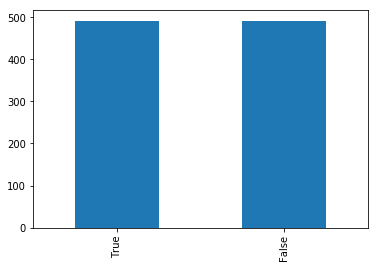

In [11]:
count_Class = pd.value_counts(undersampled["Class"] == 1, sort= True)
count_Class.plot(kind= 'bar')

Classes are now balanced.

# Splitting into training set and test set

Before splitting the data the "Time" column has to be dropped and the amount should be scaled as an unscaled amount seems to worsen the results significantly.

In [12]:
scaler= StandardScaler()
undersampled["scaled_Amount"]=  scaler.fit_transform(undersampled.iloc[:,29].values.reshape(-1,1))
undersampled= undersampled.drop(["Time","Amount"], axis= 1)

df["scaled_Amount"]=  scaler.fit_transform(df.iloc[:,29].values.reshape(-1,1))
df= df.drop(["Time","Amount"], axis= 1)

i:\venvs\data\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
X= undersampled.iloc[:, undersampled.columns != "Class"].values
y= undersampled.iloc[:, undersampled.columns == "Class"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.25, random_state= 0)

In [14]:
X_full = df.iloc[:, df.columns != "Class"].values
y_full = df.iloc[:, df.columns == "Class"].values
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(X_full, y_full, test_size= 0.25, random_state= 0)

# SVM

In [15]:
classifier= SVC(C= 1, random_state= 0, gamma='auto', kernel='linear') 
classifier.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=0, shrinking=True,
  tol=0.001, verbose=False)

In [16]:
y_pred = classifier.predict(X_test)

In [17]:
cm1 = confusion_matrix(y_test, y_pred)

The accuracy is 95.9349593495935%
The recall from the confusion matrix is 94.11764705882352%


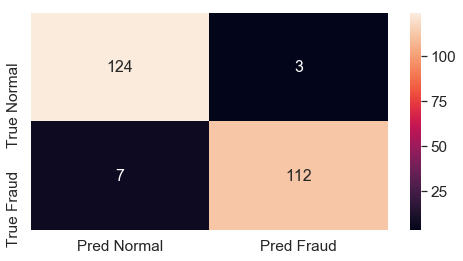

In [18]:
def confuse_the_matrix(cm):
    df_cm = pd.DataFrame(cm,
                      ['True Normal','True Fraud'],['Pred Normal','Pred Fraud'])
    plt.figure(figsize = (8,4))
    sns.set(font_scale=1.4)#for label size
    sns.heatmap(df_cm, annot=True,annot_kws={"size": 16},fmt='g')# font size

    print(f"The accuracy is {(cm[1,1]+cm[0,0])/(cm[0,0] + cm[0,1]+cm[1,0] + cm[1,1])*100}%")
    print(f"The recall from the confusion matrix is {cm[1,1]/(cm[1,0] + cm[1,1])*100}%")

confuse_the_matrix(cm1)

Testing on the full dataset:

The accuracy is 97.44529648043594%
The recall from the confusion matrix is 92.5%


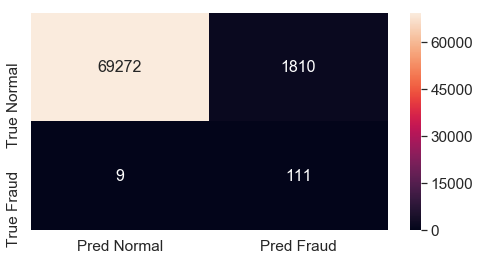

In [19]:
y_pred_full = classifier.predict(X_test_full)
cm_full = confusion_matrix(y_test_full, y_pred_full)
confuse_the_matrix(cm_full)

Results seem promising but there many false positives.

# Oneclass SVM

In [20]:
classifier = OneClassSVM(kernel='linear',gamma='auto', cache_size=500)
classifier.fit(X_train, y_train.ravel())

OneClassSVM(cache_size=500, coef0=0.0, degree=3, gamma='auto',
      kernel='linear', max_iter=-1, nu=0.5, random_state=None,
      shrinking=True, tol=0.001, verbose=False)

In [21]:
y_pred = classifier.predict(X_test)
tmp = y_pred.copy()
y_pred[tmp < 0] = 0
y_pred[tmp >= 0] = 1
y_pred

array([0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0], dtype=int64)

The accuracy is 91.46341463414635%
The recall from the confusion matrix is 90.75630252100841%


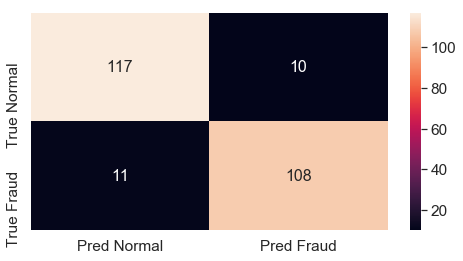

In [22]:
cm0 = confusion_matrix(y_test, y_pred)
confuse_the_matrix(cm0)

Full dataset:

The accuracy is 94.09567146990253%
The recall from the confusion matrix is 90.83333333333333%


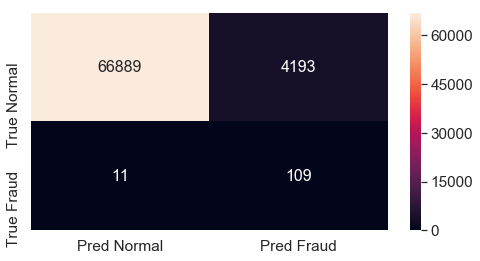

In [23]:
y_pred_full = classifier.predict(X_test_full)
tmp = y_pred_full.copy()
y_pred_full[tmp < 0] = 0
y_pred_full[tmp >= 0] = 1
cm_full = confusion_matrix(y_test_full, y_pred_full)
confuse_the_matrix(cm_full)

The sklearn documentation says the following: "The svm.OneClassSVM is known to be sensitive to outliers and thus does not perform very well for outlier detection."
My results seem to confirm this assessment as the results are worse than the normal SVM.

# Local Outlier Factor

Unsupervised Outlier Detection

In [49]:
classifier=LocalOutlierFactor(contamination='auto')
classifier.fit(X_test)

LocalOutlierFactor(algorithm='auto', contamination='auto', leaf_size=30,
          metric='minkowski', metric_params=None, n_jobs=None,
          n_neighbors=20, novelty=False, p=2)

In [50]:
y_pred = classifier.negative_outlier_factor_
tmp = y_pred.copy()
y_pred[tmp>=np.percentile(tmp,95)]=1
y_pred[tmp<np.percentile(tmp,95)]=0
y_pred

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.,
       0., 0., 0., 0., 0.

The accuracy is 47.96747967479675%
The recall from the confusion matrix is 1.680672268907563%


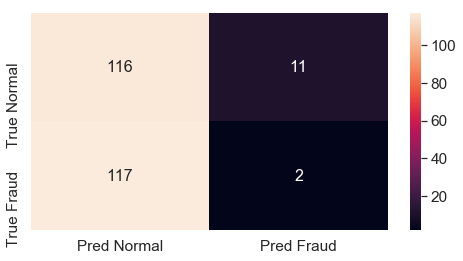

In [51]:
cm0 = confusion_matrix(y_test, y_pred)
confuse_the_matrix(cm0)

The accuracy is 94.8330103086992%
The recall from the confusion matrix is 0.8333333333333334%


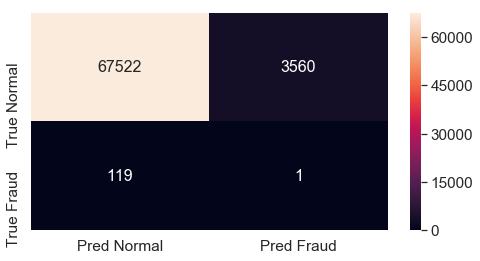

In [40]:
classifier.fit(X_test_full)
y_pred_full = classifier.negative_outlier_factor_
tmp = y_pred_full.copy()
y_pred_full[tmp>=np.percentile(tmp,95)]=1
y_pred_full[tmp<np.percentile(tmp,95)]=0
cm_full = confusion_matrix(y_test_full, y_pred_full)
confuse_the_matrix(cm_full)

I do not seem to have much luck with this method I would reckon that the method is not a good fit for the problem at hand because it only takes the immediate neighbourhood into consideration but maybe I was doing something wrong.

# Isolation Forest

In [71]:
classifier = IsolationForest(contamination='auto', behaviour='new')
classifier.fit(X_train_full, y_train_full)

IsolationForest(behaviour='new', bootstrap=False, contamination='auto',
        max_features=1.0, max_samples='auto', n_estimators=100,
        n_jobs=None, random_state=None, verbose=0)

In [77]:
y_pred = classifier.predict(X_test_full)
tmp = y_pred.copy()
y_pred[tmp < 0] = 1
y_pred[tmp >= 0] = 0

The accuracy is 96.47200921322435%
The recall from the confusion matrix is 78.33333333333333%


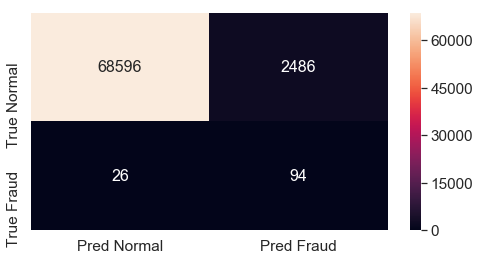

In [78]:
cm0 = confusion_matrix(y_test_full, y_pred)
confuse_the_matrix(cm0)

This method did not respond very well to undersampled data training directly on the full dataset yielded better results.

# Conclusion

Several anomaly detection algorithms where tested. Of those the most effective was the SVC algorithm
closely followed by the Isolation Forest. 

Based on these results I would choose the SVC implementation because it seemed to perform the best, 
on the other hand should execution speed be a requirement the Isolation Forest might
be a better fit because it is an ensemble method and therefore should be trivial to parallelize.

# Sources

* https://scikit-learn.org/stable/modules/outlier_detection.html#overview-of-outlier-detection-methods
* https://www.kaggle.com/ruskay7/classifying-credit-card-transactions-using-svm Helped with the first SVM and the idea to scale the amount and to drop the Time column.
* https://www.kaggle.com/rgaddati/unsupervised-fraud-detection-isolation-forest For the nice confusion matrix